In [30]:
!pip install pdbpp


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


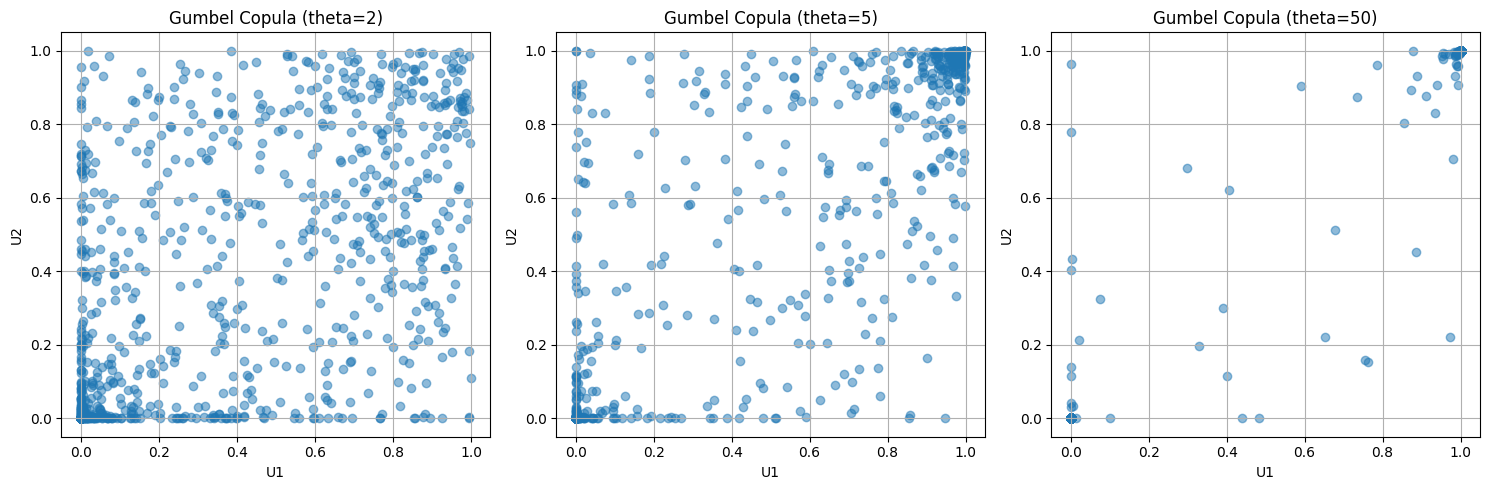

    y     x
0   5     1
1  10   7/2
2  15     6
3  20  17/2


In [12]:
!pip install --upgrade scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 43.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_21205/1408827480.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v1[i] = np.exp(-(-np.log(u1[i])/Y)**(1/theta))
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_21205/1408827480.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v2[i] = np.exp(-(-np.log(u2[i])/Y)**(1/theta))


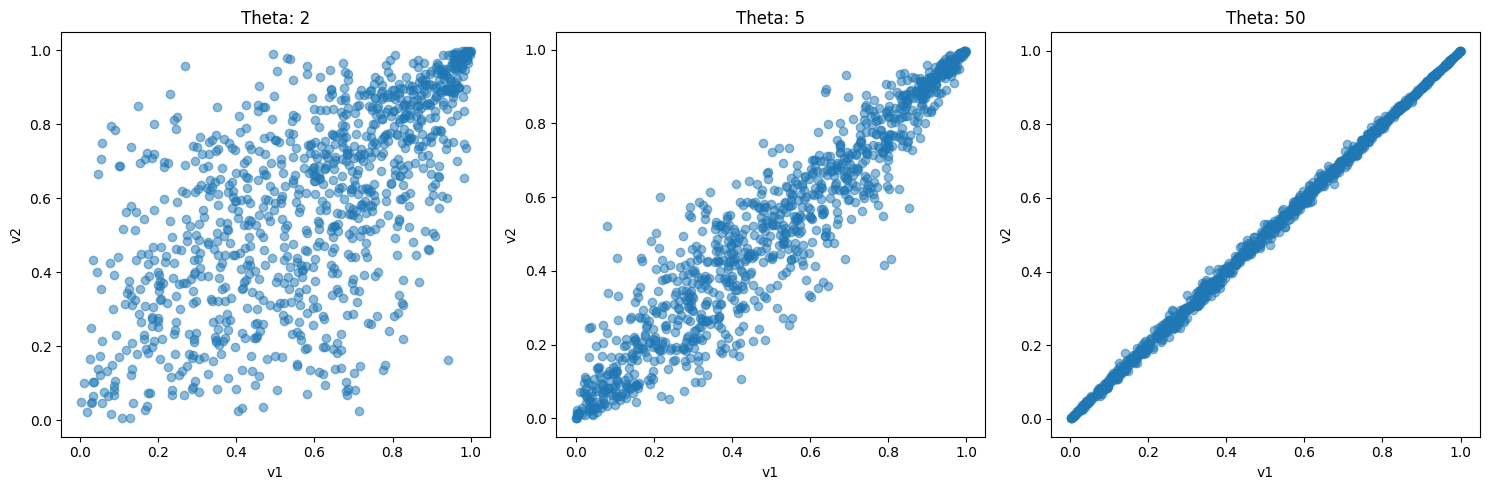

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
n = 1000
k = 2
theta_values = [2, 5, 50]
v1 = np.zeros(n, dtype=float)
v2 = np.zeros(n, dtype=float)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
u1 = np.random.uniform(low=0, high=1, size=1000)
u2 = np.random.uniform(low=0, high=1, size=1000)
plot = 0
for theta in theta_values:
    for i in range(n):
        Y = levy_stable.rvs(alpha=1/theta, beta=1, size=1)
        v1[i] = np.exp(-(-np.log(u1[i])/Y)**(1/theta))
        v2[i] = np.exp(-(-np.log(u2[i])/Y)**(1/theta))
    axes[plot].scatter(v1, v2, alpha=0.5)
    axes[plot].set_title(f"Theta: {theta}")
    axes[plot].set_xlabel("v1")
    axes[plot].set_ylabel("v2")
    plot += 1
plt.tight_layout()
plt.show()



/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_21205/1329163559.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v1[i] = np.exp((-np.log(u1[i])/Y+1)**(-1/theta))
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_21205/1329163559.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v2[i] = np.exp((-np.log(u2[i])/Y+1)**(-1/theta))


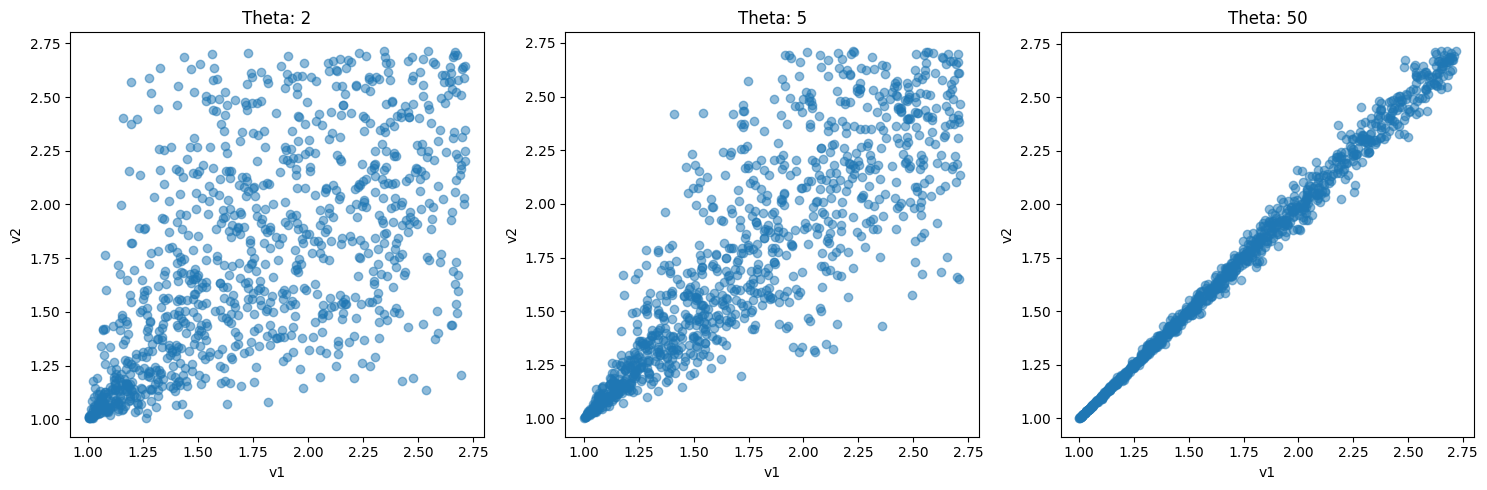

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
n = 1000
k = 2
theta_values = [2, 5, 50]
v1 = np.zeros(n, dtype=float)
v2 = np.zeros(n, dtype=float)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
u1 = np.random.uniform(low=0, high=1, size=1000)
u2 = np.random.uniform(low=0, high=1, size=1000)
plot = 0
for theta in theta_values:
    for i in range(n):
        Y = gamma.rvs(1/theta, scale=1, size=1)
        v1[i] = np.exp((-np.log(u1[i])/Y+1)**(-1/theta))
        v2[i] = np.exp((-np.log(u2[i])/Y+1)**(-1/theta))
    axes[plot].scatter(v1, v2, alpha=0.5)
    axes[plot].set_title(f"Theta: {theta}")
    axes[plot].set_xlabel("v1")
    axes[plot].set_ylabel("v2")
    plot += 1
plt.tight_layout()
plt.show()



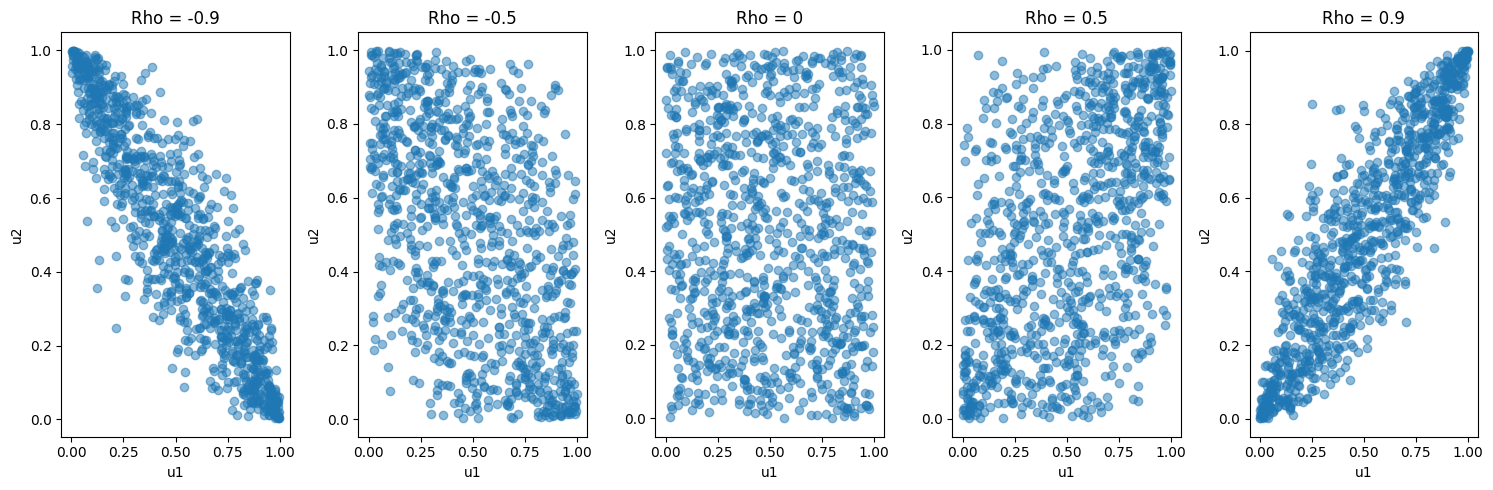

In [43]:
rho_values = [-0.9, -0.5, 0, 0.5, 0.9]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
plot = 0
for rho in rho_values:
    Sigma = [[1, rho],
            [rho, 1]]
    L = np.linalg.cholesky(Sigma)
    n_samples = 1000
    z = np.random.randn(n_samples, 2)  
    x = z.dot(L.T)
    u1 = norm.cdf(x[:, 0])  
    u2 = norm.cdf(x[:, 1])
    axes[plot].scatter(u1, u2, alpha=0.5)
    axes[plot].set_title(f'Rho = {rho}')
    axes[plot].set_xlabel('u1')
    axes[plot].set_ylabel('u2')
    plot += 1
plt.tight_layout()
plt.show()

In [103]:
import numpy as np
from scipy.stats import norm

# Given parameters
I = 5                  # Number of names
lambda_ = 0.01 / 0.65  # Intensity
rho = 0.2              # Correlation
T = 5                  # Maturity (5 years)
r = 0.04               # Risk-free interest rate
pi = 0.35              # Recovery rate
N_sim = 100000         # Number of simulations



# Construct the covariance matrix
cov_matrix = np.full((I, I), rho)  # Create a matrix filled with rho
np.fill_diagonal(cov_matrix, 1)  # Set the diagonal elements to 1 (variance of 1)

# Mean vector for the normal distribution (all zeros)
mean = np.zeros(I)

# Generate the matrix of random variables
Z_correlated = np.random.multivariate_normal(mean, cov_matrix, N_sim)

#Uniformly distributed random variables
U = norm.cdf(Z_correlated)    
U = U.transpose()


# # Compute default times (τi for each name)
tau = -np.log(U) / lambda_
tau_avg = np.mean(tau, axis=1)
print(tau_avg)


# # Sort the default times to find the N-th default
nth_default_times = np.sort(tau, axis=0)

# # Discount factor for each year, to account for the time value of money
# discount_factors = np.exp(-r * np.arange(1, T + 1))

# # Compute the expected time of the N-th default with discounting
# expected_nth_defaults = np.mean(nth_default_times, axis=0)

# # Discount the expected time of N-th default
# discounted_expected_nth_defaults = np.mean(np.exp(-r * nth_default_times), axis=0)

# # Print expected times for N-th defaults
# print("\nExpected times for Nth default (without discounting):")
# for N in range(1, I + 1):
#     print(f"  N={N}: {expected_nth_defaults[N-1]:.4f} years")

# print("\nDiscounted expected times for Nth default:")
# for N in range(1, I + 1):
#     print(f"  N={N}: {discounted_expected_nth_defaults[N-1]:.4f} years")

# # Compute the N-th to default swap spreads
# # Here, we discount the time of default based on the risk-free rate and the time horizon
# s_Ntd = (1 - pi) / discounted_expected_nth_defaults

# print("\nNth-to-default swap spreads (with discounting):")
# for N in range(1, I + 1):
#     print(f"  N={N}: {s_Ntd[N-1]:.4f}")

[65.16286093 64.93763854 65.00937923 65.20432592 64.85197341]


Spread for 1-th default: 0.002879
Expected time for 1-th default: 16.785009 years
Spread for 2-th default: 0.000686
Expected time for 2-th default: 33.476206 years
Spread for 3-th default: 0.000138
Expected time for 3-th default: 53.654544 years
Spread for 4-th default: 0.000023
Expected time for 4-th default: 82.801205 years
Spread for 5-th default: 0.000002
Expected time for 5-th default: 137.816670 years


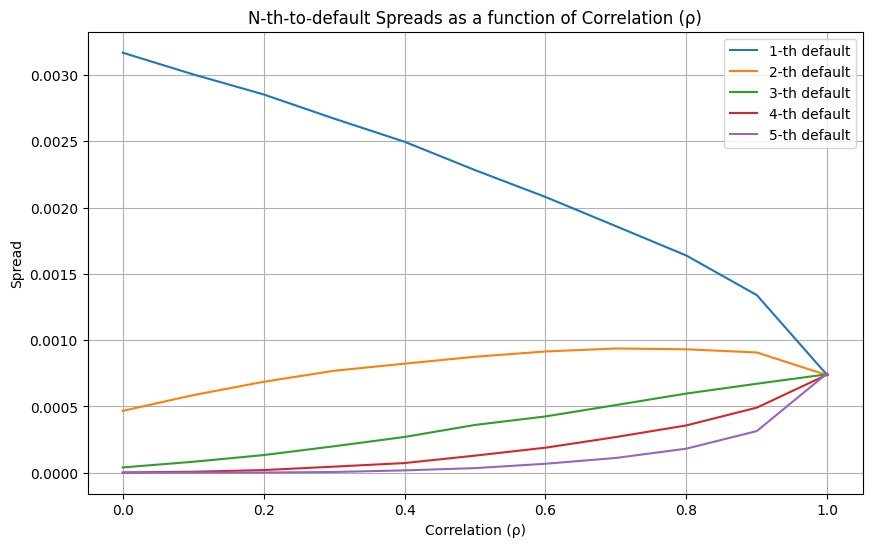

In [114]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
I = 5  
lambda_i = 0.01/.65  
recovery_rate = 0.35  
r = 0.04  
T = 5  
n_simulations = 100000  
rho = 0.2 

cov_matrix = np.full((I, I), rho)
np.fill_diagonal(cov_matrix, 1)

def simulate_default_times():
    normal_samples = np.random.multivariate_normal(np.zeros(I), cov_matrix, size=n_simulations)

    u = stats.norm.cdf(normal_samples)

    default_times = -np.log(u) / lambda_i
    return default_times

def calculate_nth_to_default_spread(N):
    default_times = simulate_default_times()
    sorted_default_times = np.sort(default_times, axis=1)
    
    nth_default_times = sorted_default_times[:, N - 1]
    survival_prob = np.mean(nth_default_times <= T)  
    spread = (1 - recovery_rate) * lambda_i * survival_prob
    expected_time = np.mean(nth_default_times)  
    
    return spread, expected_time

spreads = []
expected_times = []
for N in range(1, I + 1):
    spread, expected_time = calculate_nth_to_default_spread(N)
    spreads.append(spread)
    expected_times.append(expected_time)

for N in range(1, I + 1):
    print(f"Spread for {N}-th default: {spreads[N-1]:.6f}")
    print(f"Expected time for {N}-th default: {expected_times[N-1]:.6f} years")

correlations = np.linspace(0, 1, 11)
spread_results = []

for rho in correlations:
    cov_matrix = np.full((I, I), rho)
    np.fill_diagonal(cov_matrix, 1)
    
    rho_spreads = []
    for N in range(1, I + 1):
        spread, _ = calculate_nth_to_default_spread(N)
        rho_spreads.append(spread)
    
    spread_results.append(rho_spreads)

spread_results = np.array(spread_results)

plt.figure(figsize=(10, 6))
for N in range(1, I + 1):
    plt.plot(correlations, spread_results[:, N - 1], label=f'{N}-th default')

plt.title('N-th-to-default Spreads as a function of Correlation (ρ)')
plt.xlabel('Correlation (ρ)')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm

N = 100000   
rho = 0.2        
lambda_ = 0.01 / 0.65  
T = 5        
r = 0.04     
pi = 0.35   

Sigma = rho * np.ones((k, k)) + (1 - rho) * np.eye(k)
A = np.linalg.cholesky(Sigma)

u = np.random.rand(k, N)             
z = norm.ppf(u)                       
z_dep = A @ z                        
u_dep = norm.cdf(z_dep)               

t = -np.log(u_dep) / lambda_

t_sorted = np.sort(t, axis=0)

pleg = np.zeros((k, N))
fleg = np.zeros((k, N))

for i in range(k):
    default_times = t_sorted[i]
    discounted_protection = np.exp(-r * default_times) * (1 - pi)
    discounted_fees = np.where(
        default_times < T,
        (1 - np.exp(-r * default_times)) / r,
        (1 - np.exp(-r * T)) / r
    )
    pleg[i] = np.where(default_times < T, discounted_protection, 0)
    fleg[i] = discounted_fees

mean_pleg = np.mean(pleg, axis=1)
mean_fleg = np.mean(fleg, axis=1)

sntd = mean_pleg / mean_fleg

for i, spread in enumerate(sntd, start=1):
    print(f"{i}-th to default spread: {spread:.6f}")


plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(rhos, s_vals[i], label=f's{i+1}')

plt.xlabel('Correlation (rho)')
plt.ylabel('Spread')
plt.title('Spreads s1 to s5 vs Correlation')
plt.grid(True)
plt.legend()
plt.show()

1-th to default spread: 0.043981
2-th to default spread: 0.008999
3-th to default spread: 0.001689
4-th to default spread: 0.000258
5-th to default spread: 0.000017


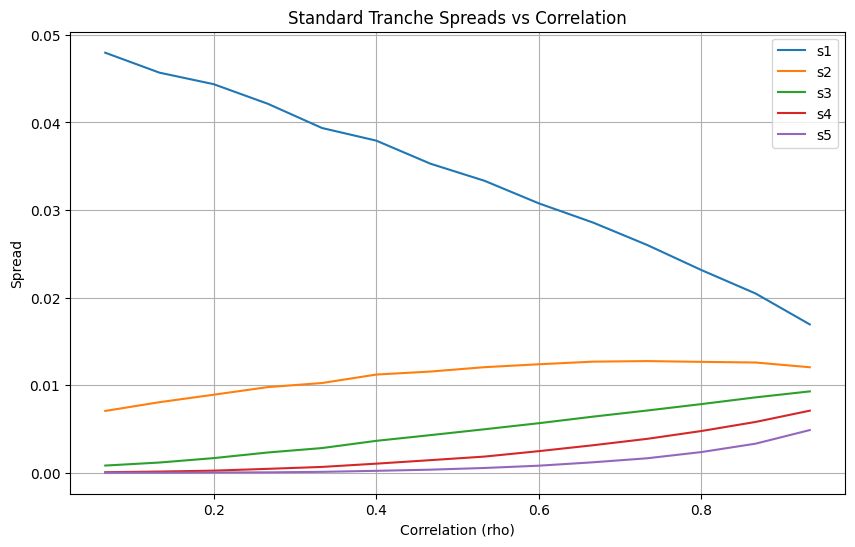

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 100000   
dt = 1 / 15
rhos = np.arange(dt, 1, dt)   
k = 5   
lambda_ = 0.01 / 0.65  
T = 5  
r = 0.04  
pi = 0.35  

s1 = np.zeros(len(rhos))
s2 = np.zeros(len(rhos))
s3 = np.zeros(len(rhos))
s4 = np.zeros(len(rhos))
s5 = np.zeros(len(rhos))

for l, rho in enumerate(rhos):
    Sigma = rho * np.ones((k, k)) + (1 - rho) * np.eye(k)
    A = np.linalg.cholesky(Sigma)

    u = np.random.rand(k, N)
    z = norm.ppf(u)
    z_dependent = A @ z
    u_dependent = norm.cdf(z_dependent)

    t = -np.log(u_dependent) / lambda_
    t_sorted = np.sort(t, axis=0)

    pleg = np.zeros((k, N))
    fleg = np.zeros((k, N))

    for i in range(k):
        default_times = t_sorted[i]
        is_default_before_T = default_times < T
        pleg[i] = np.where(is_default_before_T, np.exp(-r * default_times) * (1 - pi), 0)
        fleg[i] = np.where(
            is_default_before_T,
            (1 - np.exp(-r * default_times)) / r,
            (1 - np.exp(-r * T)) / r
        )

    meanpleg = np.mean(pleg, axis=1)
    meanfleg = np.mean(fleg, axis=1)

    s1[l] = meanpleg[0] / meanfleg[0]
    s2[l] = meanpleg[1] / meanfleg[1]
    s3[l] = meanpleg[2] / meanfleg[2]
    s4[l] = meanpleg[3] / meanfleg[3]
    s5[l] = meanpleg[4] / meanfleg[4]

plt.figure(figsize=(10, 6))
plt.plot(rhos, s1, label='s1')
plt.plot(rhos, s2, label='s2')
plt.plot(rhos, s3, label='s3')
plt.plot(rhos, s4, label='s4')
plt.plot(rhos, s5, label='s5')
plt.xlabel('Correlation (rho)')
plt.ylabel('Spread')
plt.title('Standard Tranche Spreads vs Correlation')
plt.legend()
plt.grid(True)
plt.show()